# Task 2: Prediction using Unsupervised ML
**Goal: Predict the optimum number of clusters and represent it visually based on the Iris dataset** 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yellowbrick
import plotly.express as px
from sklearn import datasets
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
import matplotlib.pyplot as pyplot
%matplotlib inline
# resource = https://medium.com/analytics-vidhya/clustering-on-iris-dataset-in-python-using-k-means-4735b181affe


## Data Understanding and Preparation

In [4]:
df_iris = pd.read_csv('Iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df_iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualisation
I will check the trends between the different fields through with seaborn's pairplot (correlation plot).

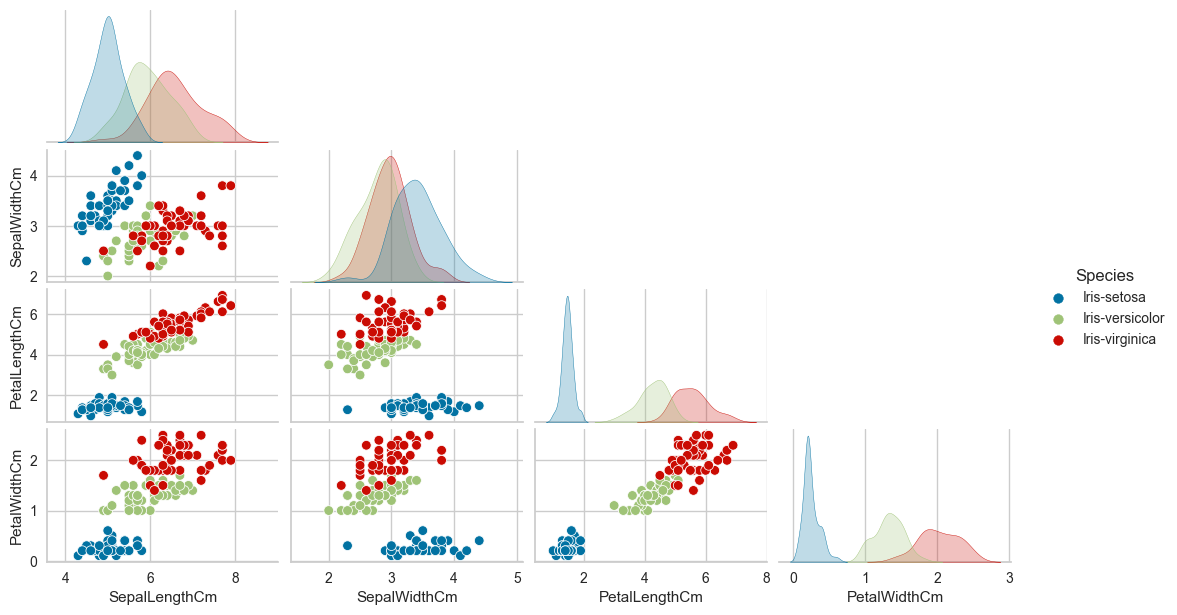

In [29]:
#sns.set(rc = {'figure.figsize':(5,5)})
#Use seaborn's pairplot, corner is used to only show the difference between each variable once
g= sns.pairplot(df_iris.iloc[:,1:], corner=True, hue='Species')
#Changing the dimensions of the plot
g.fig.set_size_inches(12,6)

Based on the above correlation plot:
* The three species seem to follow grouped trends to eachother
* Seems to be strong positive correlations with PetalWidth and Petal Length
* Postives correlations between most fields
* Moderate positive correlations between Petal Width and Sepal Length and Petal length and Sepal Length

## Determining the number of clusters
For this I will use the elbow method to determine the certain number of clusters that will best fit our K Means Algorithm.

In [10]:
#Converting all fields into a multidimensional array where the record is stored in a array of an array
X = df_iris.iloc[:, [0,1,2,3]].values
X[:3]

array([[1. , 5.1, 3.5, 1.4],
       [2. , 4.9, 3. , 1.4],
       [3. , 4.7, 3.2, 1.3]])

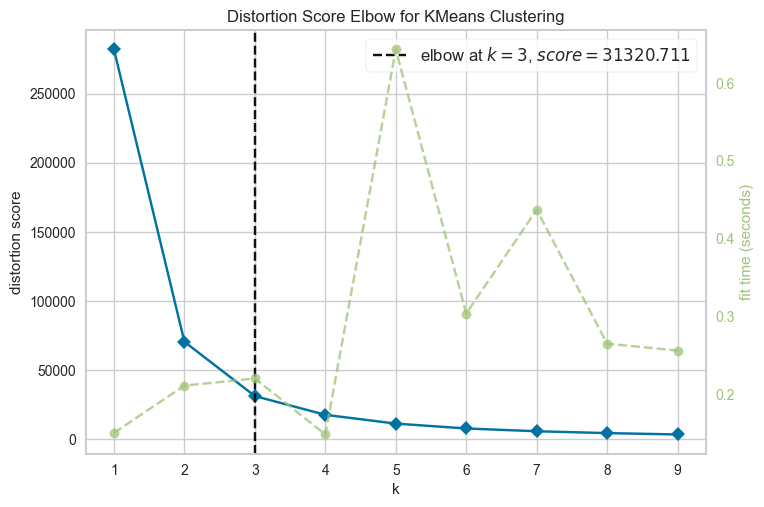

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
#Will use yellow bricks Elbow visualiser
kmeans = KMeans(random_state=42, n_init=10, max_iter=300)
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Ultimately based on our Elbow method **3 clusters** would be the best as it is the cluster most positioned at the elbow and as shown above in the plot is predicted to be the best number.

# Data Modelling

Will apply K Means to the dataset then will create the K Means classifier

In [33]:
# Apply kmeans to the dataset
kmeans = KMeans(n_clusters= 3, init = 'k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

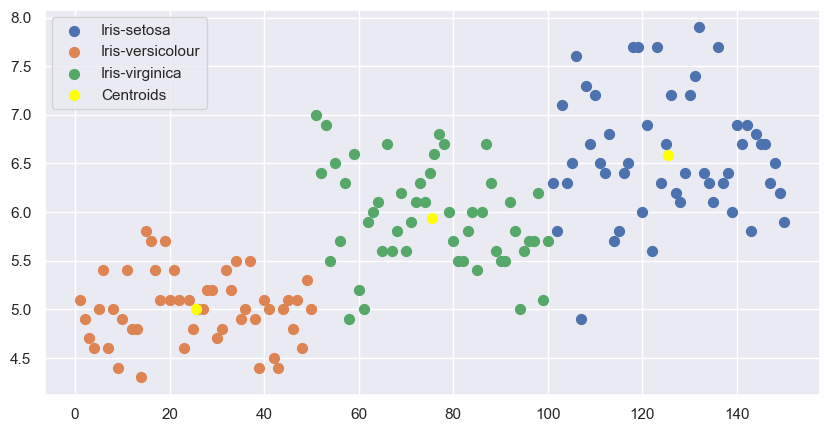

In [56]:
#Plot the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1], s=50, label='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1], s=50, label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1], s=50, label= 'Iris-virginica')
#plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c = 'yellow', label= 'Centroids')
plt.legend()


The plot above shows that three groups was the best fit to the Kmeans algorithm we can see that the centroids are in the middle of each group and groups are spread out accurately.

# Conclusion
Ultimately I found that 3 clusters was the most suitable for this analysis additionally this makes sense due to having three different species of flowers as when grouped to three clusters the plot above groups the flowers measurements based on their species.